# How do users' sentiment polarities and subjectivities change over time for popular apps in different categories, and what factors (such as updates, bug fixes, or new features) contribute to these changes? (Attributes: App Category, Time, Sentiment Polarity, Sentiment Subjectivity, Sentiment Subjectivity)

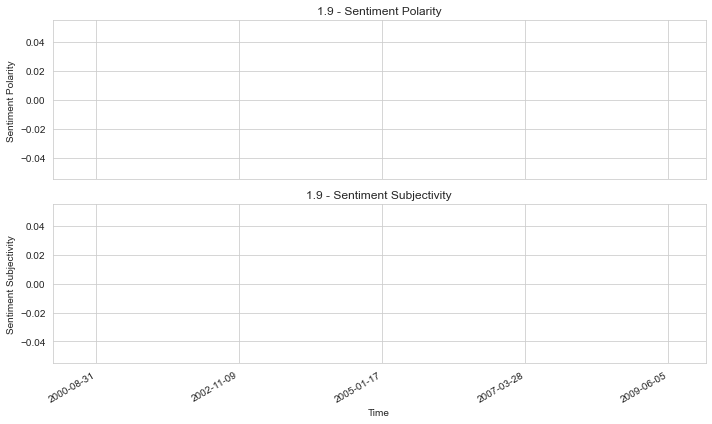

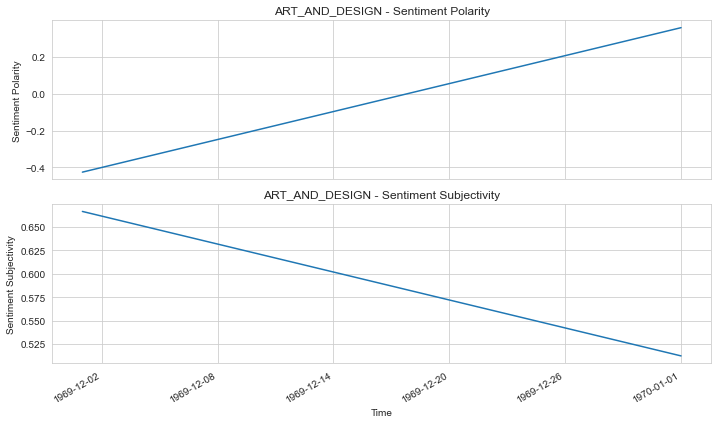

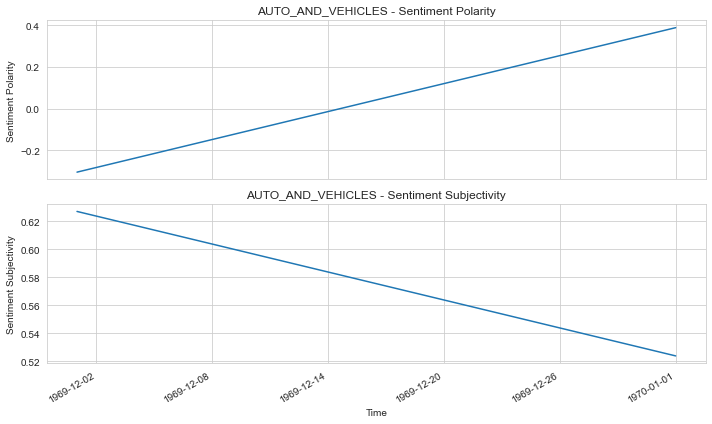

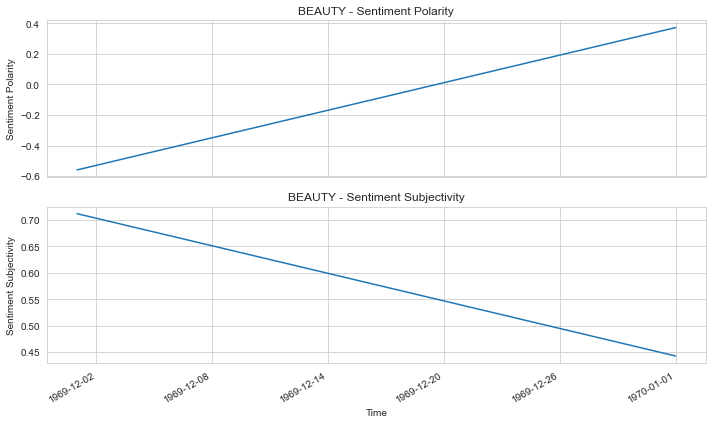

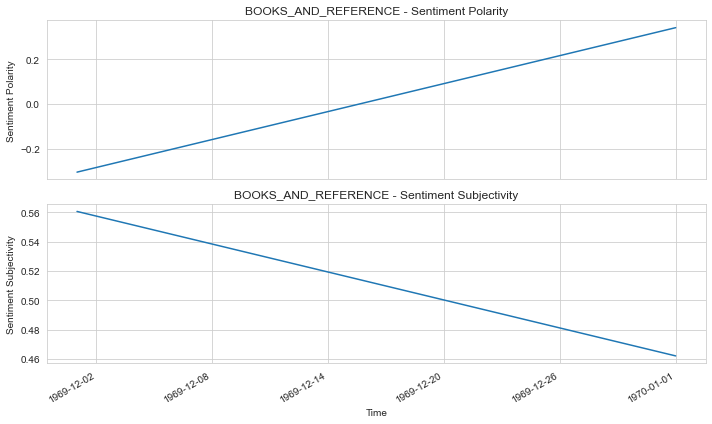

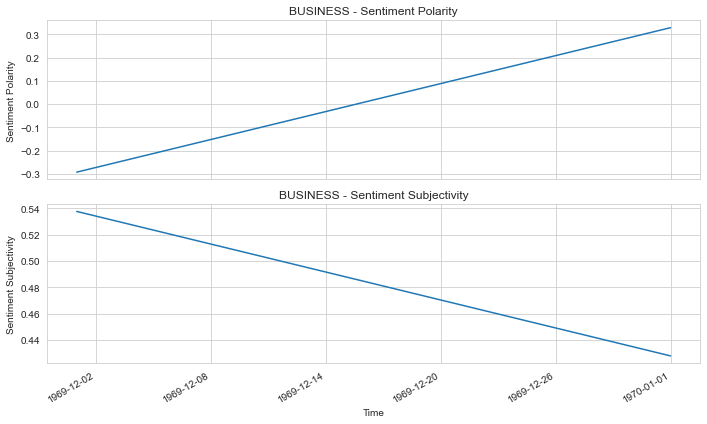

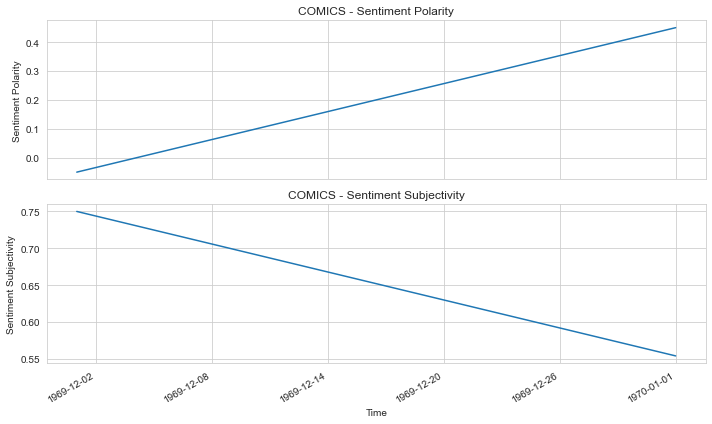

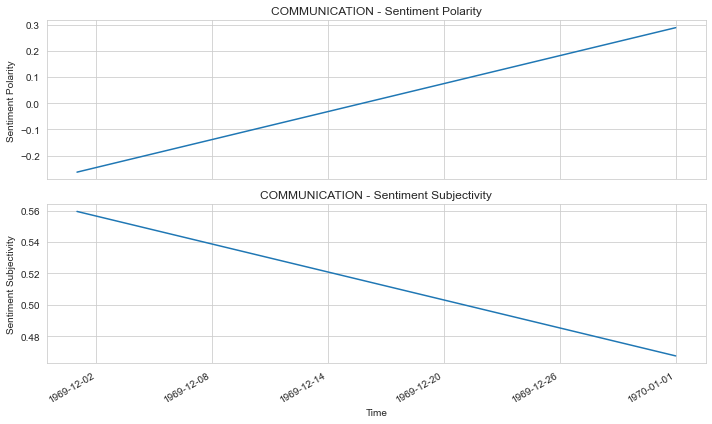

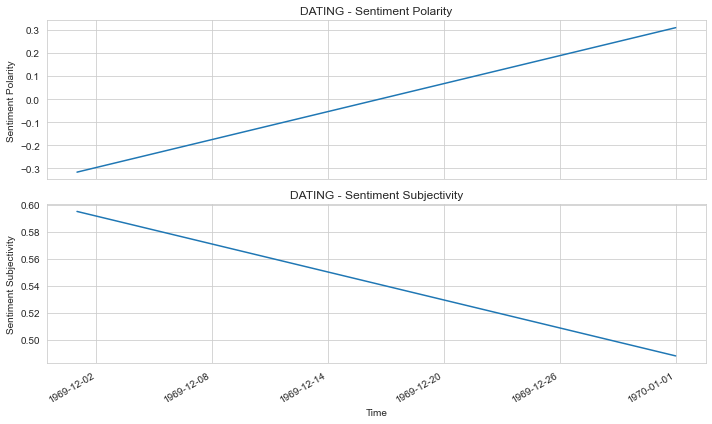

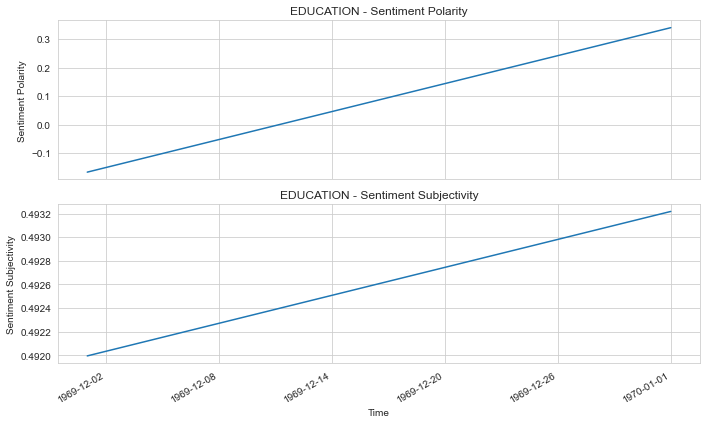

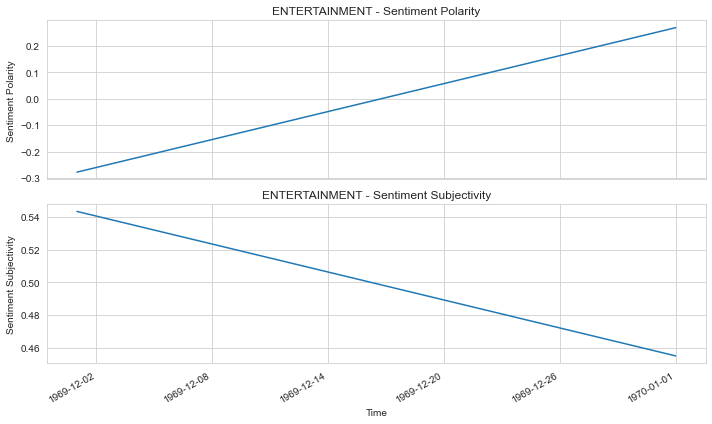

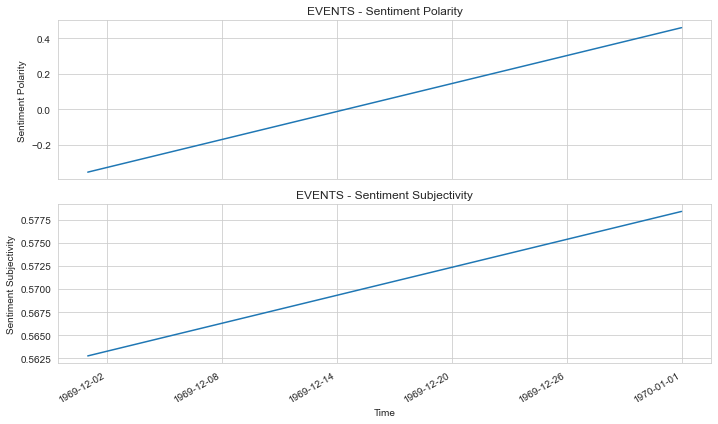

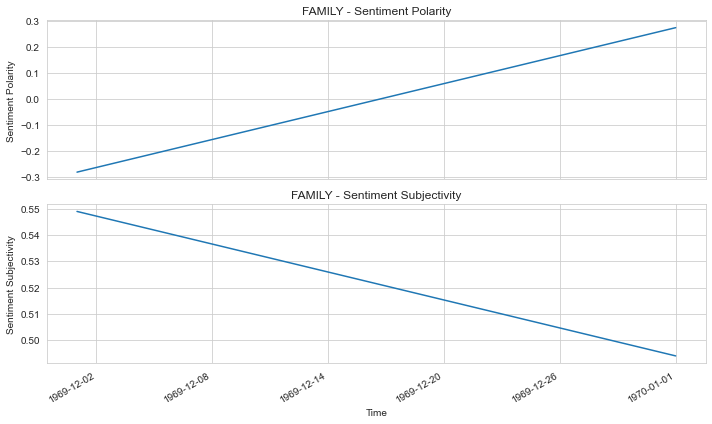

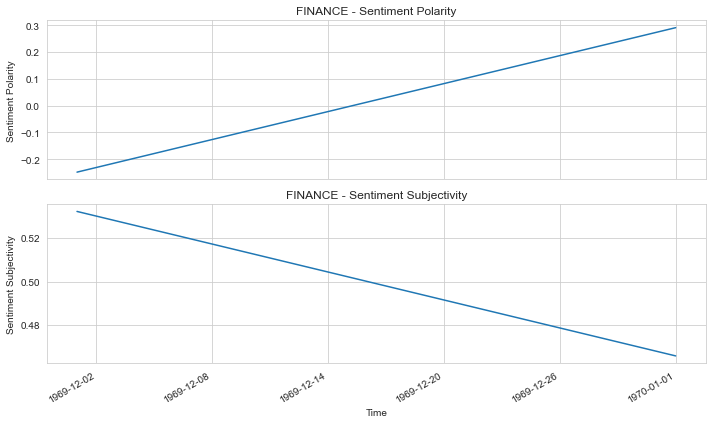

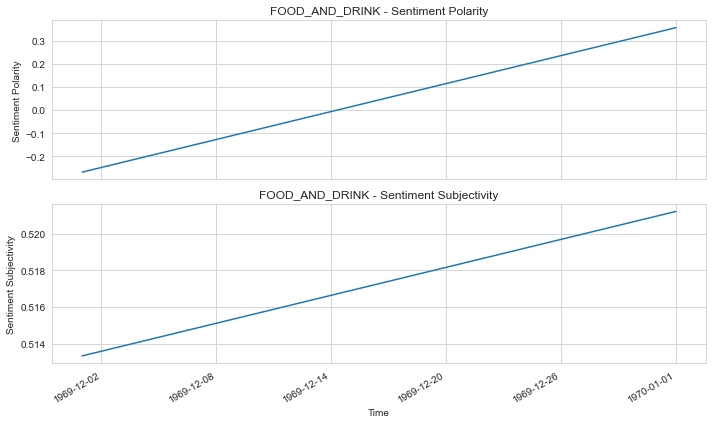

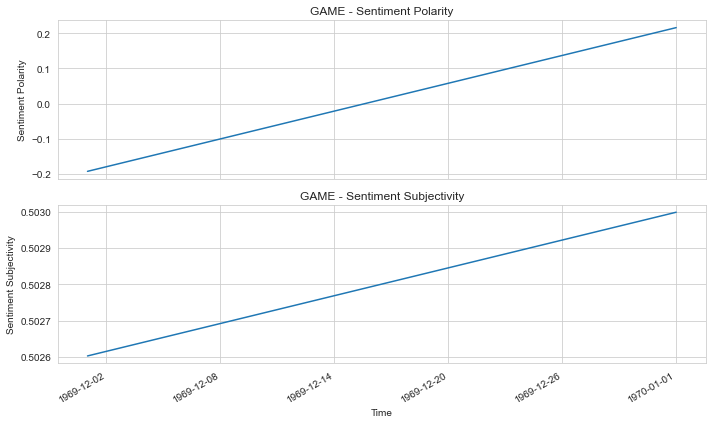

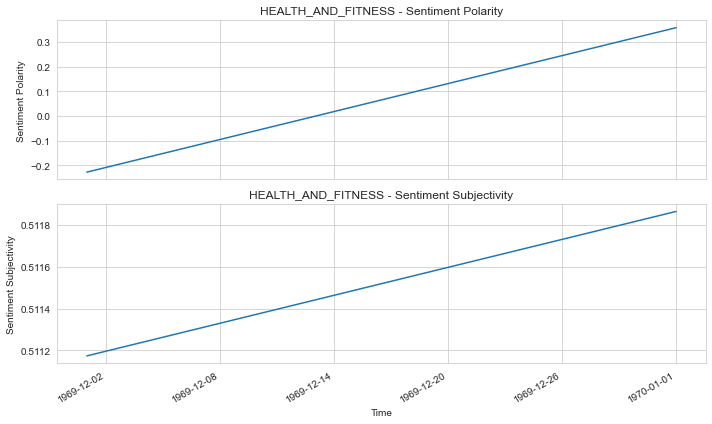

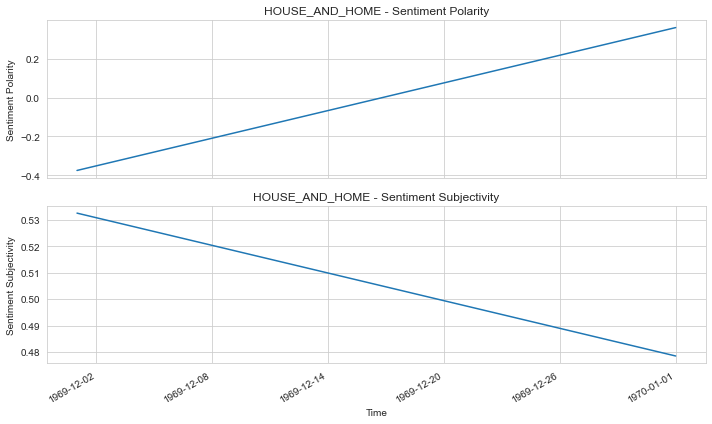

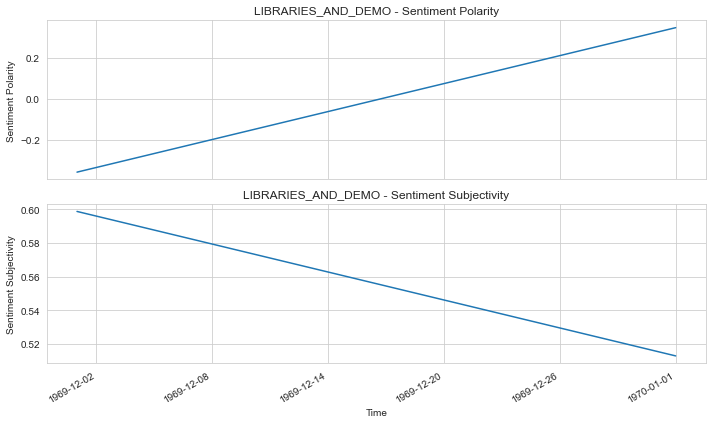

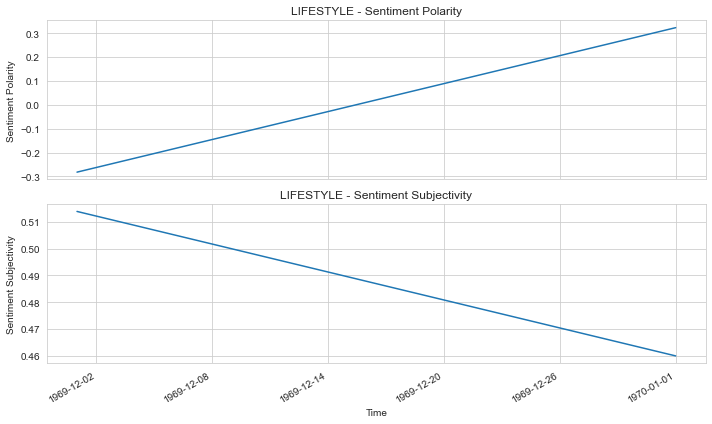

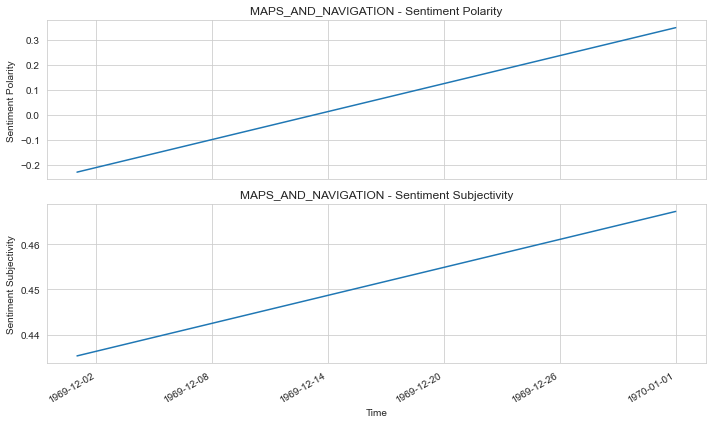

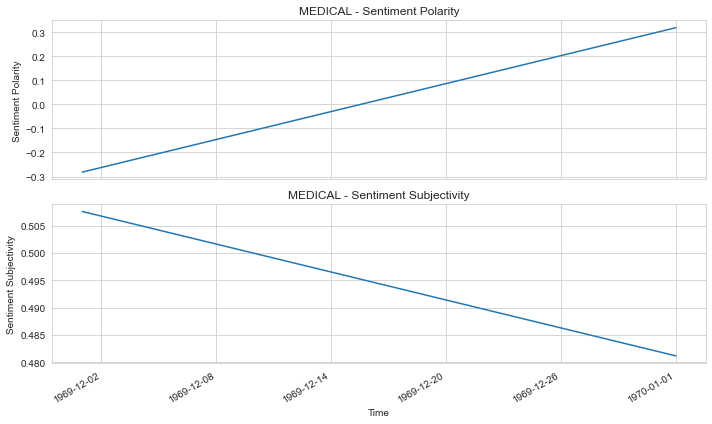

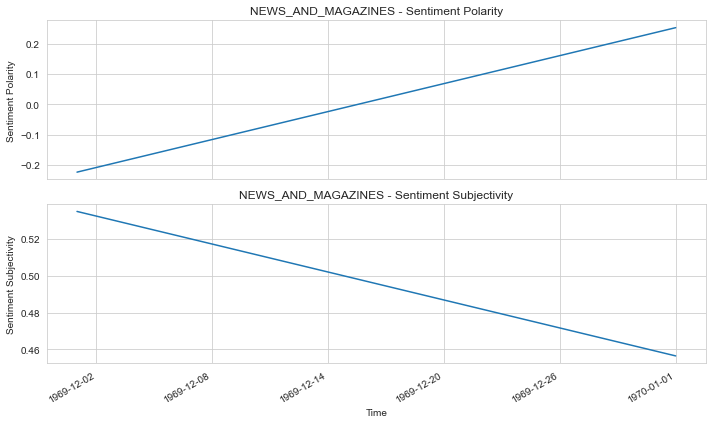

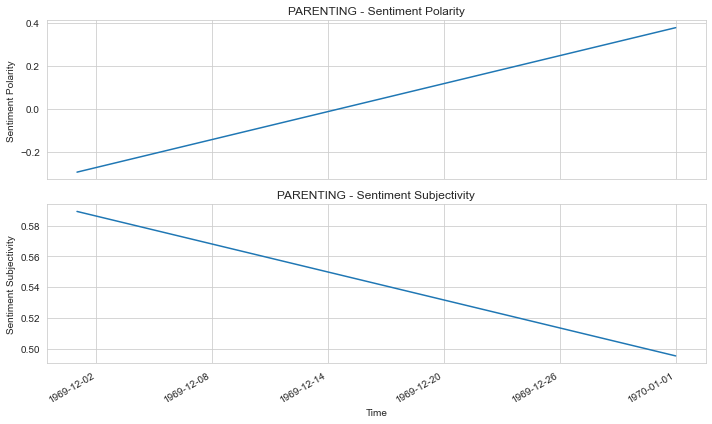

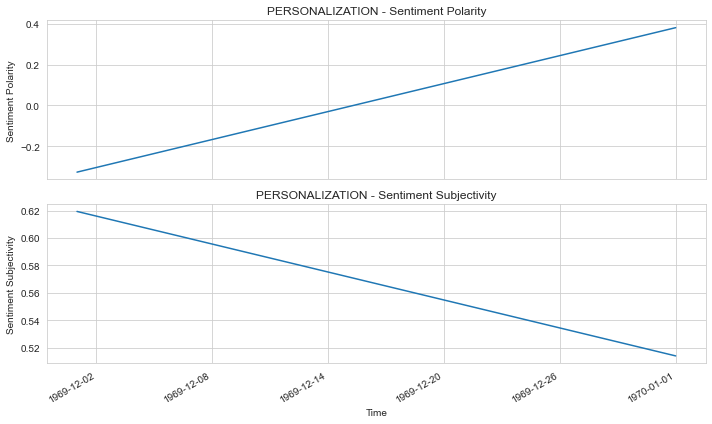

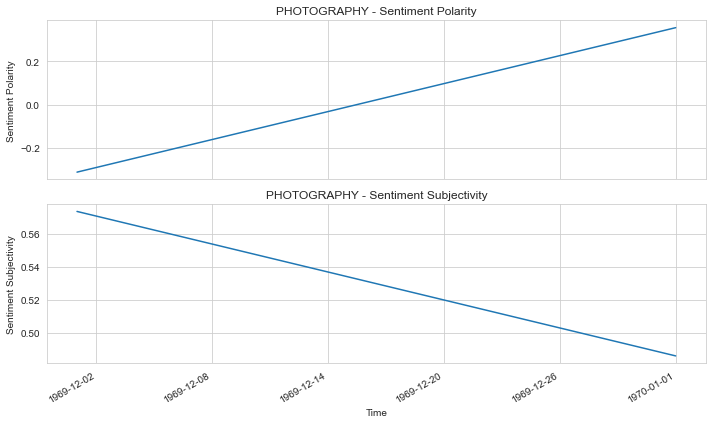

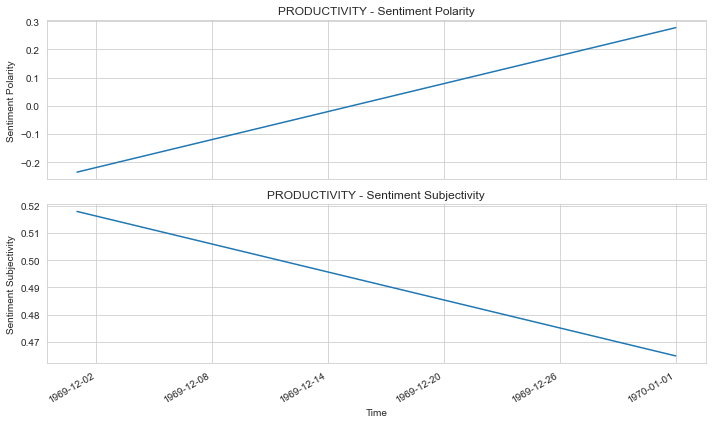

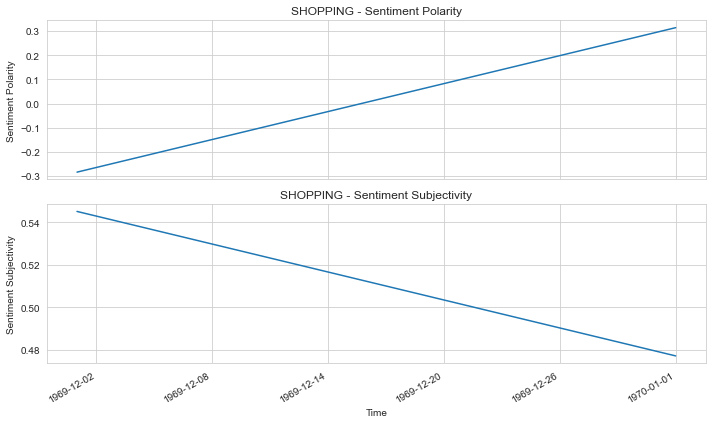

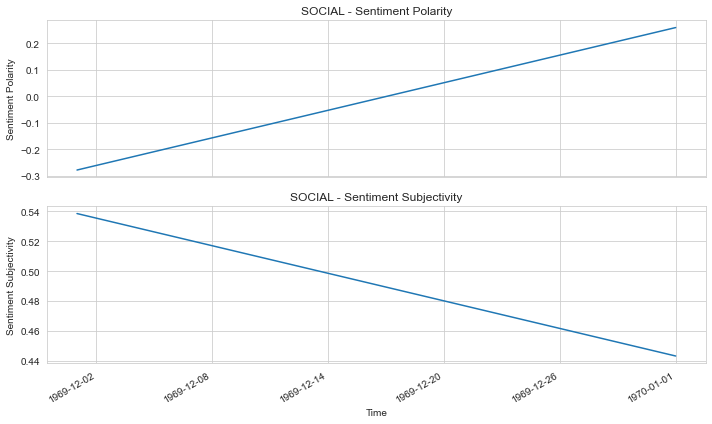

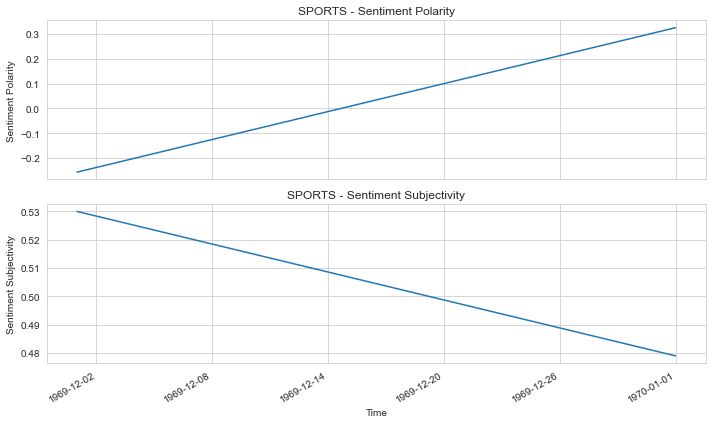

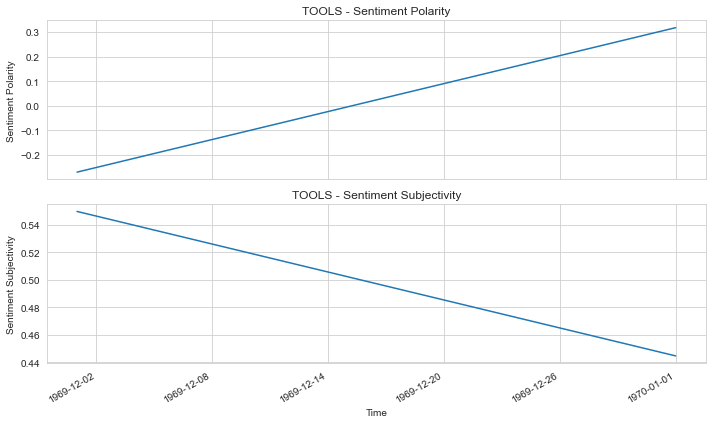

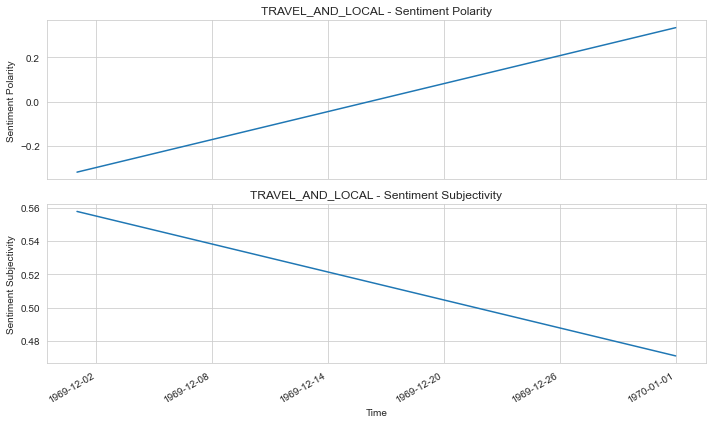

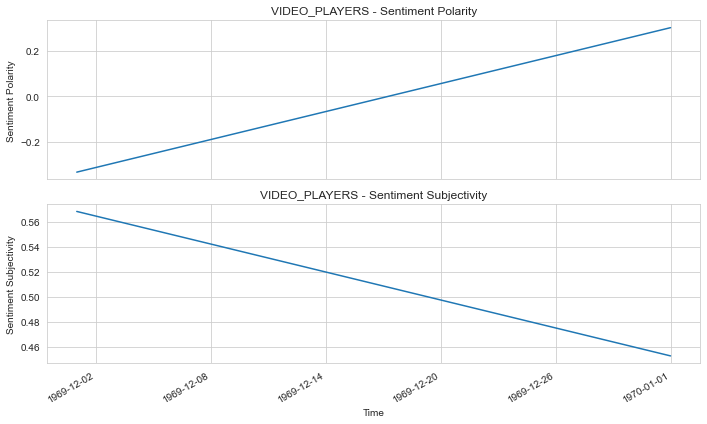

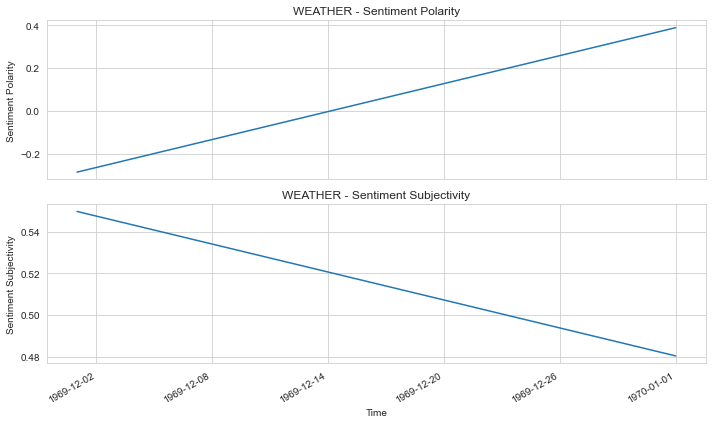

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
apps_df = pd.read_csv("C:/Users/Amina Firdouse/Desktop/masters-EA/Project/googleplaystore.csv")
reviews_df = pd.read_csv("C:/Users/Amina Firdouse/Desktop/masters-EA/Project/googleplaystore_user_reviews.csv")

# Clean and preprocess the data
apps_df.drop_duplicates(subset="App", inplace=True)
apps_df = apps_df[apps_df["Rating"].notna()]
apps_df["Category"] = apps_df["Category"].astype("category")
reviews_df.dropna(subset=["Sentiment"], inplace=True)

# Merge the dataframes on app name
merged_df = pd.merge(apps_df, reviews_df, on="App", how="inner")

# Group the data by category and time to calculate average sentiment polarity and subjectivity
merged_df["Date"] = pd.to_datetime(merged_df["Sentiment_Polarity"], unit="s").dt.date
merged_df["Month"] = pd.to_datetime(merged_df["Sentiment_Polarity"], unit="s").dt.to_period("M")
grouped_df = merged_df.groupby(["Category", "Month"]).agg({"Sentiment_Polarity": "mean", "Sentiment_Subjectivity": "mean"})

# Plot the results
categories = grouped_df.index.levels[0]
for category in categories:
    fig, axs = plt.subplots(2, figsize=(10, 6))
    data = grouped_df.loc[category]
    axs[0].plot(data.index.to_timestamp(), data["Sentiment_Polarity"])
    axs[0].set_title(f"{category} - Sentiment Polarity")
    axs[0].set_ylabel("Sentiment Polarity")
    axs[1].plot(data.index.to_timestamp(), data["Sentiment_Subjectivity"])
    axs[1].set_title(f"{category} - Sentiment Subjectivity")
    axs[1].set_ylabel("Sentiment Subjectivity")
    fig.autofmt_xdate()
    axs[0].xaxis.set_major_locator(plt.MaxNLocator(6))
    axs[1].xaxis.set_major_locator(plt.MaxNLocator(6))
    plt.xlabel("Time")
    plt.tight_layout()
    plt.show()
